In [1]:
%cd /content/drive/MyDrive/GEI_Ashish

/content/drive/MyDrive/GEI_Ashish


In [2]:
ls

 GaitDataset/  'GEI Images'/   Resnet50_Gait.ipynb


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.metrics import *

#from livelossplot import PlotLossesKeras

In [4]:
path = "GaitDataset"
angles = os.listdir(path)
angles

['090', '072', '108', '000', '054', '126', '162', '144', '036', '018', '180']

In [5]:
train_dict = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
val_dict = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
for angle in angles:
  angle_path = os.path.join(path, angle)
  
  train_path = os.path.join(angle_path, "train")
  val_path = os.path.join(angle_path, "val")
  
  train_dict[angle] = train_path
  val_dict[angle] = val_path

In [6]:
print(train_dict)
print(val_dict)
train_dict["126"]

{'000': 'GaitDataset/000/train', '018': 'GaitDataset/018/train', '036': 'GaitDataset/036/train', '054': 'GaitDataset/054/train', '072': 'GaitDataset/072/train', '090': 'GaitDataset/090/train', '108': 'GaitDataset/108/train', '126': 'GaitDataset/126/train', '144': 'GaitDataset/144/train', '162': 'GaitDataset/162/train', '180': 'GaitDataset/180/train'}
{'000': 'GaitDataset/000/val', '018': 'GaitDataset/018/val', '036': 'GaitDataset/036/val', '054': 'GaitDataset/054/val', '072': 'GaitDataset/072/val', '090': 'GaitDataset/090/val', '108': 'GaitDataset/108/val', '126': 'GaitDataset/126/val', '144': 'GaitDataset/144/val', '162': 'GaitDataset/162/val', '180': 'GaitDataset/180/val'}


'GaitDataset/126/train'

In [7]:
train_gen = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}
val_gen = {"000":[], "018":[], "036":[], "054":[], "072":[], 
              "090":[], "108":[], "126":[], "144":[], "162":[], 
              "180":[]}

In [8]:
for angle in angles:
  train_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2, shear_range= 0.2)
  val_datagen = ImageDataGenerator(rescale = 1./255, width_shift_range= 0.2, shear_range= 0.2)
  
  print("working directory : ", angle)

  print(" For Training")
  train_gen[angle] = train_datagen.flow_from_directory(train_dict[angle], 
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = "categorical")
  print(" For Validating")
  val_gen[angle] = val_datagen.flow_from_directory(val_dict[angle], 
                                                       target_size = (224, 224),
                                                       batch_size = 8,
                                                       class_mode = "categorical")

working directory :  090
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  072
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  108
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  000
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  054
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  126
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  162
 For Training
Found 240 images belonging to 6 classes.
 For Validating
Found 60 images belonging to 6 classes.
working directory :  144
 For Training
Found 240

In [9]:
c1=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=6, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

c2=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=3, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
)

94773248/94765736 [==============================] - 1s 0us/step
Epoch 1/10
30/30 [==============================] - 181s 6s/step - loss: 1.9620 - accuracy: 0.1504 - val_loss: 1.8468 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8712 - accuracy: 0.1380 - val_loss: 1.8058 - val_accuracy: 0.1333
Epoch 3/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8120 - accuracy: 0.1886 - val_loss: 1.8027 - val_accuracy: 0.2333
Epoch 4/10
30/30 [==============================] - 5s 166ms/step - loss: 1.8304 - accuracy: 0.1382 - val_loss: 1.7910 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 164ms/step - loss: 1.8174 - accuracy: 0.1715 - val_loss: 1.7959 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 166ms/step - loss: 1.8395 - accuracy: 0.1245 - val_loss: 1.8514 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 165ms/step - loss: 1.8433 - a

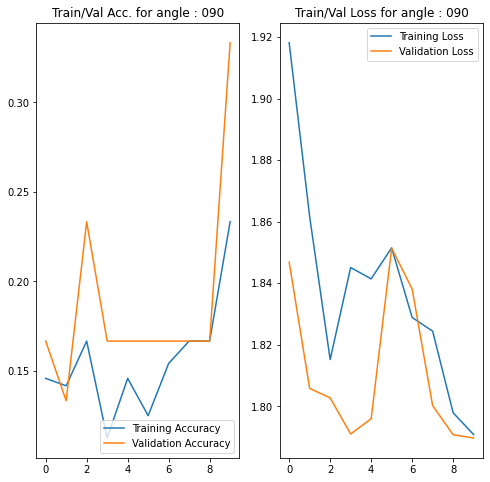

Epoch 1/10
30/30 [==============================] - 161s 5s/step - loss: 1.9505 - accuracy: 0.1888 - val_loss: 1.8724 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8574 - accuracy: 0.1545 - val_loss: 1.8057 - val_accuracy: 0.2333
Epoch 3/10
30/30 [==============================] - 5s 170ms/step - loss: 1.8323 - accuracy: 0.1601 - val_loss: 1.8184 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8366 - accuracy: 0.1953 - val_loss: 1.8073 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 170ms/step - loss: 1.8437 - accuracy: 0.1646 - val_loss: 1.8118 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 171ms/step - loss: 1.8055 - accuracy: 0.1868 - val_loss: 1.7978 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 166ms/step - loss: 1.7885 - accuracy: 0.1852 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 8

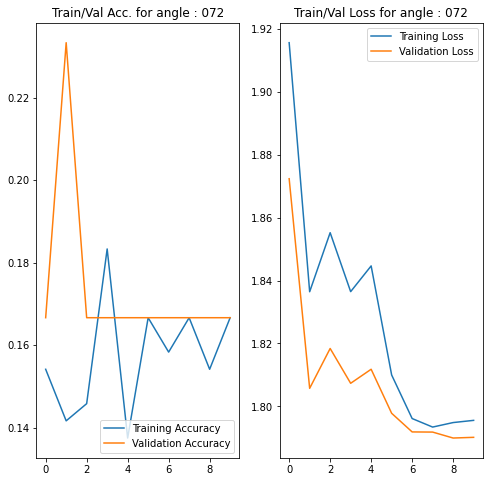

Epoch 1/10
30/30 [==============================] - 181s 6s/step - loss: 1.8944 - accuracy: 0.1532 - val_loss: 1.8257 - val_accuracy: 0.2000
Epoch 2/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8459 - accuracy: 0.1162 - val_loss: 1.8216 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 171ms/step - loss: 1.8429 - accuracy: 0.1597 - val_loss: 1.8008 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 5s 171ms/step - loss: 1.8093 - accuracy: 0.1660 - val_loss: 1.8380 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8205 - accuracy: 0.1612 - val_loss: 1.8077 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 171ms/step - loss: 1.8245 - accuracy: 0.1630 - val_loss: 1.7936 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8207 - accuracy: 0.2006 - val_loss: 1.8480 - val_accuracy: 0.1667
Epoch 8

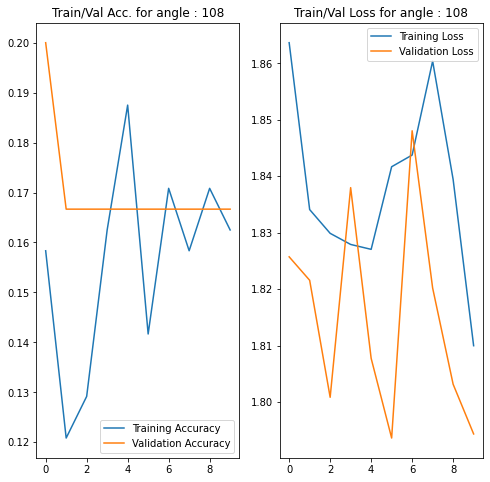

Epoch 1/10
30/30 [==============================] - 161s 5s/step - loss: 1.8920 - accuracy: 0.1511 - val_loss: 1.8411 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8088 - accuracy: 0.1559 - val_loss: 1.7756 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 178ms/step - loss: 1.8151 - accuracy: 0.1667 - val_loss: 1.7909 - val_accuracy: 0.1833
Epoch 4/10
30/30 [==============================] - 5s 165ms/step - loss: 1.8166 - accuracy: 0.1663 - val_loss: 1.7705 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 165ms/step - loss: 1.7862 - accuracy: 0.1830 - val_loss: 1.7530 - val_accuracy: 0.3167
Epoch 6/10
30/30 [==============================] - 5s 167ms/step - loss: 1.7624 - accuracy: 0.2545 - val_loss: 1.7359 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 166ms/step - loss: 1.7484 - accuracy: 0.2411 - val_loss: 1.7245 - val_accuracy: 0.2500
Epoch 8

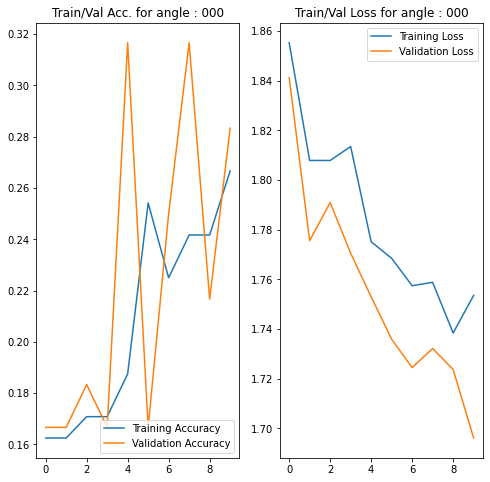

Epoch 1/10
30/30 [==============================] - 156s 5s/step - loss: 1.8897 - accuracy: 0.1620 - val_loss: 1.8122 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 174ms/step - loss: 1.8225 - accuracy: 0.2176 - val_loss: 1.8381 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 169ms/step - loss: 1.8459 - accuracy: 0.1532 - val_loss: 1.8092 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8130 - accuracy: 0.1719 - val_loss: 1.8119 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8302 - accuracy: 0.1855 - val_loss: 1.8176 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8401 - accuracy: 0.1472 - val_loss: 1.8340 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8286 - accuracy: 0.1731 - val_loss: 1.8016 - val_accuracy: 0.1667
Epoch 8

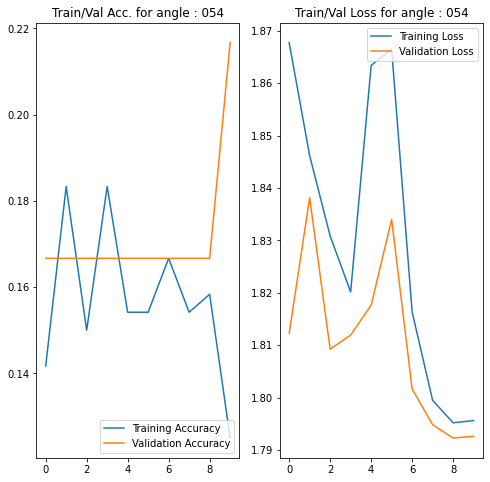

Epoch 1/10
30/30 [==============================] - 162s 5s/step - loss: 2.0399 - accuracy: 0.1159 - val_loss: 1.8136 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8324 - accuracy: 0.1660 - val_loss: 1.8329 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 172ms/step - loss: 1.8122 - accuracy: 0.1512 - val_loss: 1.8086 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 5s 169ms/step - loss: 1.8105 - accuracy: 0.1609 - val_loss: 1.8182 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8241 - accuracy: 0.1732 - val_loss: 1.8002 - val_accuracy: 0.2500
Epoch 6/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8117 - accuracy: 0.1867 - val_loss: 1.8111 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 166ms/step - loss: 1.8266 - accuracy: 0.1993 - val_loss: 1.8112 - val_accuracy: 0.1667
Epoch 8

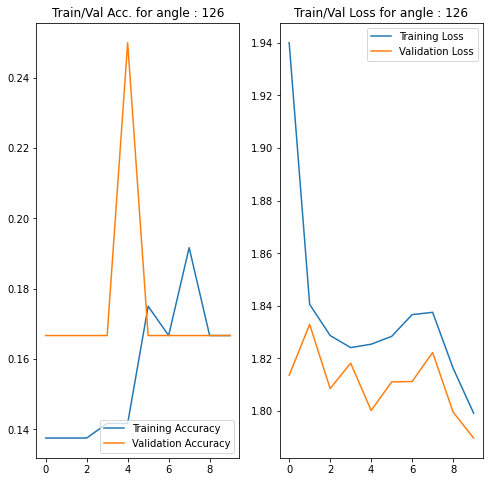

Epoch 1/10
30/30 [==============================] - 168s 5s/step - loss: 2.2241 - accuracy: 0.1273 - val_loss: 1.8503 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8270 - accuracy: 0.1426 - val_loss: 1.8148 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 170ms/step - loss: 1.8013 - accuracy: 0.2016 - val_loss: 1.8060 - val_accuracy: 0.1833
Epoch 4/10
30/30 [==============================] - 5s 168ms/step - loss: 1.8001 - accuracy: 0.1874 - val_loss: 1.7986 - val_accuracy: 0.2833
Epoch 5/10
30/30 [==============================] - 5s 174ms/step - loss: 1.8006 - accuracy: 0.2203 - val_loss: 1.8027 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 174ms/step - loss: 1.7970 - accuracy: 0.1953 - val_loss: 1.7770 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 171ms/step - loss: 1.7597 - accuracy: 0.2393 - val_loss: 1.7765 - val_accuracy: 0.1667
Epoch 8

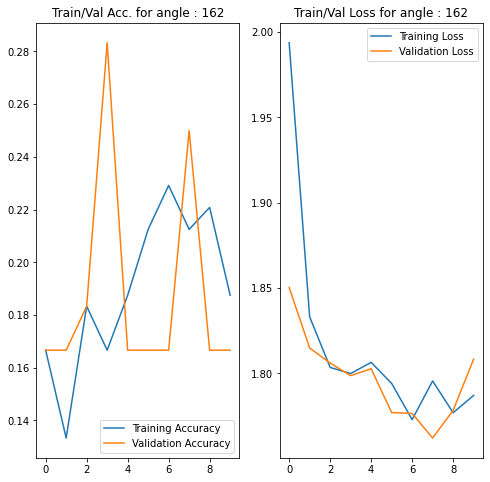

Epoch 1/10
30/30 [==============================] - 170s 6s/step - loss: 1.8838 - accuracy: 0.1657 - val_loss: 1.8035 - val_accuracy: 0.1333
Epoch 2/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8435 - accuracy: 0.2052 - val_loss: 1.8809 - val_accuracy: 0.1500
Epoch 3/10
30/30 [==============================] - 5s 171ms/step - loss: 1.8887 - accuracy: 0.1317 - val_loss: 1.8072 - val_accuracy: 0.1333
Epoch 4/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8507 - accuracy: 0.1769 - val_loss: 1.8039 - val_accuracy: 0.1833
Epoch 5/10
30/30 [==============================] - 5s 167ms/step - loss: 1.7796 - accuracy: 0.2352 - val_loss: 1.7900 - val_accuracy: 0.2500
Epoch 6/10
30/30 [==============================] - 5s 170ms/step - loss: 1.7920 - accuracy: 0.2645 - val_loss: 1.7834 - val_accuracy: 0.2833
Epoch 7/10
30/30 [==============================] - 5s 168ms/step - loss: 1.7827 - accuracy: 0.2891 - val_loss: 1.7818 - val_accuracy: 0.1833
Epoch 8

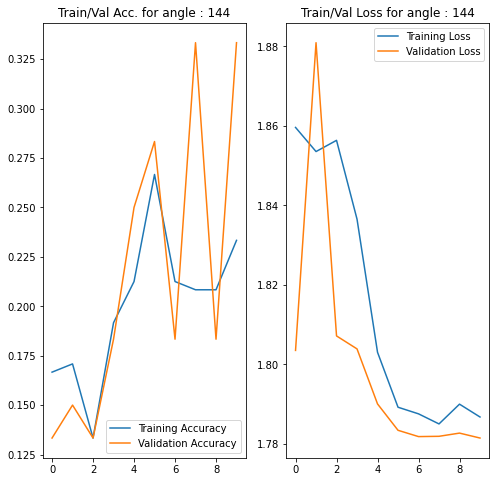

Epoch 1/10
30/30 [==============================] - 157s 5s/step - loss: 2.0342 - accuracy: 0.0946 - val_loss: 1.8097 - val_accuracy: 0.1000
Epoch 2/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8144 - accuracy: 0.1276 - val_loss: 1.8091 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 170ms/step - loss: 1.8141 - accuracy: 0.1607 - val_loss: 1.8038 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 5s 173ms/step - loss: 1.8138 - accuracy: 0.1799 - val_loss: 1.8280 - val_accuracy: 0.1667
Epoch 5/10
30/30 [==============================] - 5s 169ms/step - loss: 1.8514 - accuracy: 0.1210 - val_loss: 1.8679 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8401 - accuracy: 0.1352 - val_loss: 1.8112 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8079 - accuracy: 0.1750 - val_loss: 1.7928 - val_accuracy: 0.1667
Epoch 8

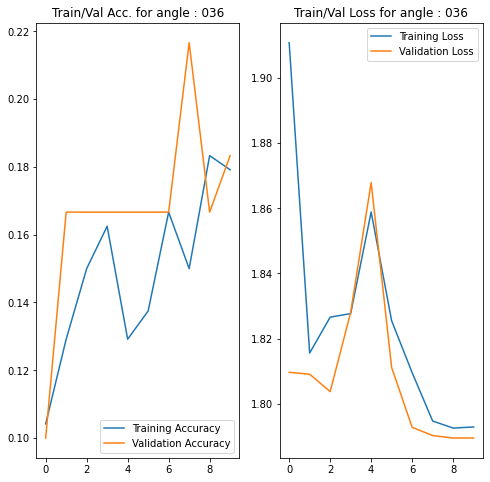

Epoch 1/10
30/30 [==============================] - 163s 5s/step - loss: 2.0274 - accuracy: 0.1580 - val_loss: 1.8601 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 171ms/step - loss: 1.8597 - accuracy: 0.1435 - val_loss: 1.8107 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 166ms/step - loss: 1.8333 - accuracy: 0.1641 - val_loss: 1.8174 - val_accuracy: 0.1667
Epoch 4/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8161 - accuracy: 0.1837 - val_loss: 1.7886 - val_accuracy: 0.2333
Epoch 5/10
30/30 [==============================] - 5s 167ms/step - loss: 1.8101 - accuracy: 0.1559 - val_loss: 1.7774 - val_accuracy: 0.1667
Epoch 6/10
30/30 [==============================] - 5s 167ms/step - loss: 1.7990 - accuracy: 0.1664 - val_loss: 1.7896 - val_accuracy: 0.1667
Epoch 7/10
30/30 [==============================] - 5s 167ms/step - loss: 1.7477 - accuracy: 0.2281 - val_loss: 1.7734 - val_accuracy: 0.1667
Epoch 8

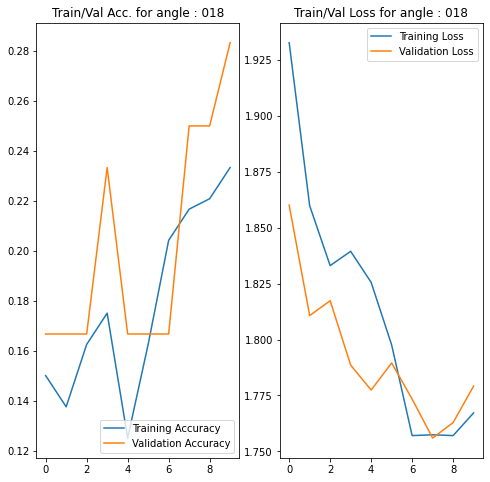

Epoch 1/10
30/30 [==============================] - 163s 5s/step - loss: 1.9431 - accuracy: 0.1965 - val_loss: 1.8078 - val_accuracy: 0.1667
Epoch 2/10
30/30 [==============================] - 5s 172ms/step - loss: 1.7939 - accuracy: 0.2130 - val_loss: 1.7881 - val_accuracy: 0.1667
Epoch 3/10
30/30 [==============================] - 5s 169ms/step - loss: 1.7996 - accuracy: 0.1812 - val_loss: 1.7869 - val_accuracy: 0.1833
Epoch 4/10
30/30 [==============================] - 5s 170ms/step - loss: 1.7610 - accuracy: 0.2386 - val_loss: 1.7715 - val_accuracy: 0.3167
Epoch 5/10
30/30 [==============================] - 5s 166ms/step - loss: 1.7540 - accuracy: 0.2088 - val_loss: 1.7264 - val_accuracy: 0.1833
Epoch 6/10
30/30 [==============================] - 5s 168ms/step - loss: 1.7044 - accuracy: 0.3921 - val_loss: 1.7259 - val_accuracy: 0.3167
Epoch 7/10
30/30 [==============================] - 5s 166ms/step - loss: 1.6995 - accuracy: 0.2826 - val_loss: 1.7474 - val_accuracy: 0.2833
Epoch 8

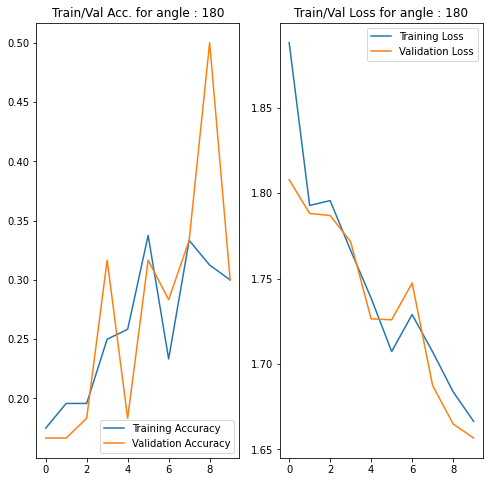

In [10]:
for angle in angles:
  model1=tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', 
     pooling='avg')
  model1.trainable = False
  
  model = keras.Sequential([model1,layers.Dense(6,activation='softmax')])
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  
  history=model.fit(train_gen[angle],validation_data=val_gen[angle],epochs=10,callbacks=[c1,c2])

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(10)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy ')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Train/Val Acc. for angle : {}'.format(angle))

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Train/Val Loss for angle : {}'.format(angle))
  plt.show()